### Importation des librairies

In [188]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sea
import math
import scipy
sns.set()

### Importation du dataset

In [152]:
earthquake = pd.read_csv("earthquake.csv")

### Exploration du dataset

In [153]:
earthquake.head(10)

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0
5,2.010000e+13,2005.01.21,12:04:03 AM,37.11,27.75,turkey,mugla,demirciler_milas,south_west,0.1,32.8,3.5,3.5,0.0,NaN,0.0,0.0
6,2.010000e+13,2012.06.24,12:07:22 AM,38.75,43.61,turkey,van,ilikaynak,south_west,0.1,9.4,4.5,0.0,4.5,NaN,0.0,0.0
7,1.990000e+13,1987.12.31,12:49:54 AM,39.43,27.98,turkey,balikesir,dikkonak_bigadic,south_east,0.1,26.0,3.8,3.8,0.0,NaN,0.0,0.0
8,2.000000e+13,2000.02.07,12:11:45 AM,40.05,34.07,turkey,kirikkale,kocabas_delice,south_east,0.1,1.0,3.8,3.8,0.0,NaN,0.0,0.0
9,2.010000e+13,2011.10.28,12:47:56 AM,38.76,43.54,turkey,van,degirmenozu,south_east,0.1,3.1,4.3,0.0,4.2,NaN,0.0,4.3


In [154]:
earthquake.tail()

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
24002,2.020000e+13,2017.03.10,12:23:42 AM,37.50,38.48,turkey,adiyaman,kirmacik_samsat,NaN,NaN,13.0,4.2,0.0,4.2,4.0,0.0,0.0
24003,2.020000e+13,2017.03.10,12:42:44 AM,40.47,35.84,turkey,amasya,kizoglu,NaN,NaN,5.6,3.6,0.0,3.5,3.6,0.0,0.0
24004,2.020000e+13,2017.04.05,12:08:11 AM,38.63,27.57,turkey,manisa,cavusoglu,NaN,NaN,10.6,4.1,0.0,4.0,4.1,0.0,0.0
24005,2.020000e+13,2017.04.05,12:35:09 AM,38.65,27.55,turkey,manisa,cavusoglu,NaN,NaN,8.7,3.8,0.0,3.6,3.8,0.0,0.0
24006,2.020000e+13,2017.04.05,12:25:25 AM,38.63,27.58,turkey,manisa,cavusoglu,NaN,NaN,9.0,3.5,0.0,3.4,3.5,0.0,0.0


In [155]:
earthquake.shape

(24007, 17)

In [177]:
earthquake.drop(['dist'], axis='columns', inplace=True)

In [178]:
earthquake.head()

,date,depth,xm,md,richter,ms,mb
0,2003.05.20,10.0,4.1,4.1,0.0,0.0,0.0
1,2007.08.01,5.2,4.0,3.8,4.0,0.0,0.0
2,1978.05.07,0.0,3.7,0.0,0.0,0.0,3.7
3,1997.03.22,10.0,3.5,3.5,0.0,0.0,0.0
4,2000.04.02,7.0,4.3,4.3,0.0,0.0,0.0


Le dataset est omposé de 24007 lignes sur 17 colonnes.
Parmis ces 17 colonnes je n'en garderais que ? qui sont: 

date, dist, depth(depth of earthquake), xm, md, richter(magitude), ms(magnitude des ondes de surface), mb(La magnitude des ondes de volume). 
je drop les autres colonnes car elles sont soit inutilisable dans le cadre de cette problèmatique soit ne contienne pas suffisament d'information.

In [179]:
earthquake.isna().sum()

date       0
depth      0
xm         0
md         0
richter    0
ms         0
mb         0
dtype: int64

In [182]:
earthquake.shape

(24007, 7)

In [186]:
earthquake.dtypes

date       datetime64[ns]
depth             float64
xm                float64
md                float64
richter           float64
ms                float64
mb                float64
dtype: object

In [185]:
earthquake['date'] = pd.to_datetime(earthquake['date'])

In [187]:
earthquake.describe()

,depth,xm,md,richter,ms,mb
count,24007.000000,24007.000000,24007.000000,24007.000000,24007.000000,24007.000000
mean,18.491773,4.056038,1.912346,2.196826,0.677677,1.690561
std,23.218553,0.574085,2.059780,2.081417,1.675708,2.146108
min,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.600000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,3.900000,0.000000,3.500000,0.000000,0.000000
75%,22.400000,4.400000,3.800000,4.000000,0.000000,4.100000
max,225.000000,7.900000,7.400000,7.200000,7.900000,7.100000


Ce tableau présente les moyennes, ecarts-type, minimum, quartiles et maximum pour chaque variable numérique étudiée.

### Distribution des variables d'intérêt

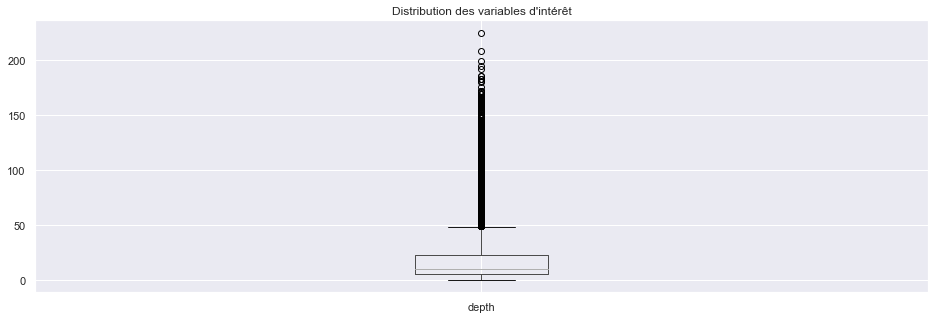

In [208]:
plt.figure(figsize=(16,5))
plt.title("Distribution des variables d'intérêt")
earthquake.boxplot(column='depth')
plt.show()

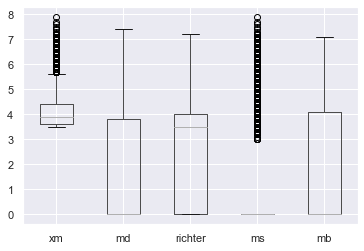

In [216]:
earthquake.boxplot(column=['xm','md','richter','ms','mb'])
plt.show()